In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('/content/Airline_review.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            23171 non-null  object 
 1   Overall_Rating          23171 non-null  object 
 2   Review_Title            23171 non-null  object 
 3   Review Date             23171 non-null  object 
 4   Verified                23171 non-null  bool   
 5   Review                  23171 non-null  object 
 6   Aircraft                7129 non-null   object 
 7   Type Of Traveller       19433 non-null  object 
 8   Seat Type               22075 non-null  object 
 9   Route                   19343 non-null  object 
 10  Date Flown              19417 non-null  object 
 11  Seat Comfort            19016 non-null  float64
 12  Cabin Staff Service     18911 non-null  float64
 13  Food & Beverages        14500 non-null  float64
 14  Ground Service          18378 non-null

In [15]:
print("Null values count in each column before cleaning:\n",df.isnull().sum())

Null values count in each column before cleaning:
 Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64


In [3]:
# Impute missing values for 'Aircraft' with a placeholder value, e.g., 'Unknown'
df['Aircraft'].fillna('Unknown', inplace=True)

# Impute missing values for categorical columns with the mode (most frequent value)
df['Type Of Traveller'].fillna(df['Type Of Traveller'].mode()[0], inplace=True)

# Impute missing values for 'Route' with a placeholder value, e.g., 'Unknown'
df['Route'].fillna('Unknown', inplace=True)

# Impute missing values for 'Date Flown' with a placeholder value, e.g., 'Unknown'
df['Date Flown'].fillna('Unknown', inplace=True)

# Impute missing values for numeric columns with the mean
numeric_columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']
for column in numeric_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Verify that there are no more missing values
print("Null values count in each column after cleaning:\n",df.isnull().sum())

Null values count in each column after cleaning:
 Airline Name                 0
Overall_Rating               0
Review_Title                 0
Review Date                  0
Verified                     0
Review                       0
Aircraft                     0
Type Of Traveller            0
Seat Type                 1096
Route                        0
Date Flown                   0
Seat Comfort                 0
Cabin Staff Service          0
Food & Beverages             0
Ground Service               0
Inflight Entertainment       0
Wifi & Connectivity          0
Value For Money              0
Recommended                  0
dtype: int64


In [4]:
def map_n_rating(x):
    res = x
    if x == 'n':
        res = '1'

    return res

df["Overall_Rating"] = df["Overall_Rating"].apply(map_n_rating)

In [5]:
value_for_money_median_map = {
    "1": 1,
    "2": 1,
    "3": 2,
    "4": 2,
    "5": 3,
    "6": 4,
    "7": 4,
    "8": 4,
    "9": 5,
}

df['Median_value_for_money'] = df['Overall_Rating'].map(value_for_money_median_map)

df["Value For Money"] = df.apply(
    lambda row: row['Median_value_for_money'] if np.isnan(row["Value For Money"]) else row["Value For Money"],
    axis=1
)
df=df.drop(columns=['Median_value_for_money'])

In [6]:
df['Seat Type'] = df['Seat Type'].fillna('Economy Class')

In [7]:
df['Review Date'] = pd.to_datetime(df['Review Date'])

In [8]:
df['Type Of Traveller'] = df['Type Of Traveller'].astype('category')
df['Seat Type'] = df['Seat Type'].astype('category')
df['Recommended'] = df['Recommended'].map({'yes': 1, 'no': 0})

In [49]:
from google.colab import files

df.to_csv('Cleaned_df.csv')
files.download('Cleaned_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

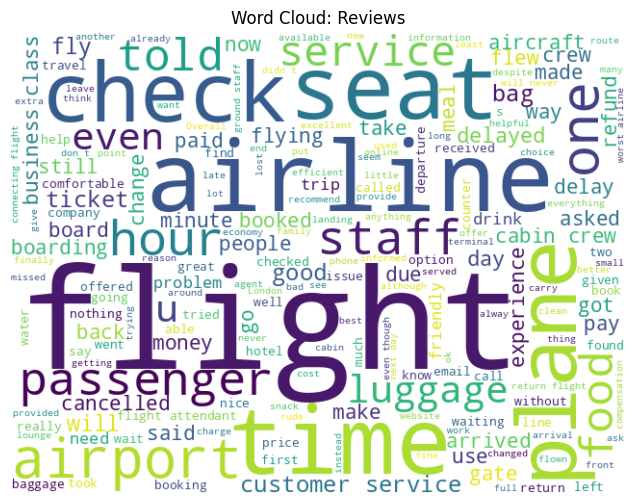

In [ ]:
from wordcloud import WordCloud

reviews_text = ' '.join(df['Review'].astype(str))
wordcloud = WordCloud(width=640, height=480, background_color='white').generate(reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Reviews')
plt.show()

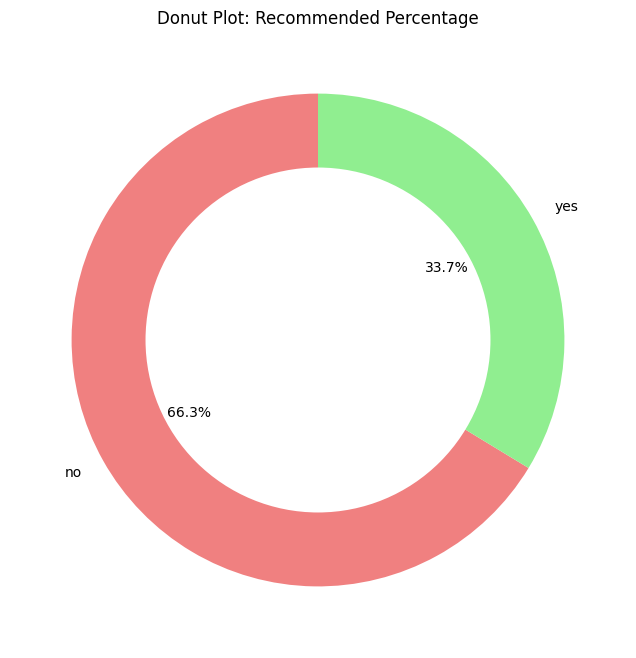

In [ ]:
recommended_counts = df['Recommended'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(recommended_counts, labels=recommended_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.title('Donut Plot: Recommended Percentage')
plt.show()

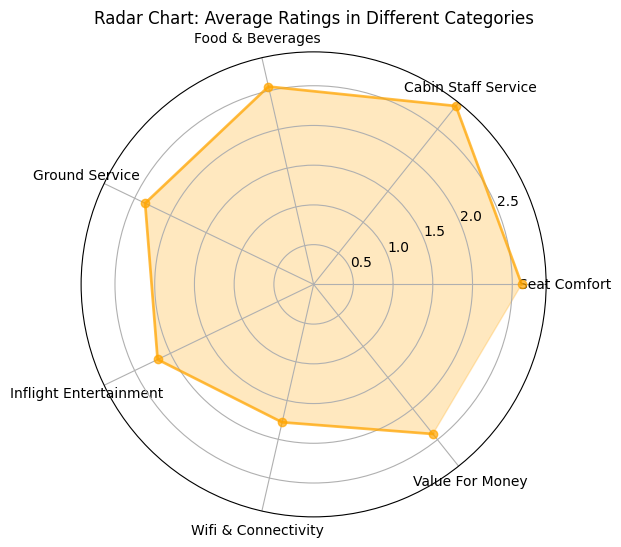

In [ ]:
rating_categories = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']
ratings_means = df[rating_categories].mean()
angles = [n / float(len(rating_categories)) * 2 * 3.14159 for n in range(len(rating_categories))]
plt.figure(figsize=(6, 8))
plt.polar(angles, ratings_means, marker='o', linestyle='-', color='orange', linewidth=2, alpha=0.7)
plt.fill(angles, ratings_means, color='orange', alpha=0.25)
plt.title('Radar Chart: Average Ratings in Different Categories')
plt.xticks(angles, rating_categories)
plt.show()

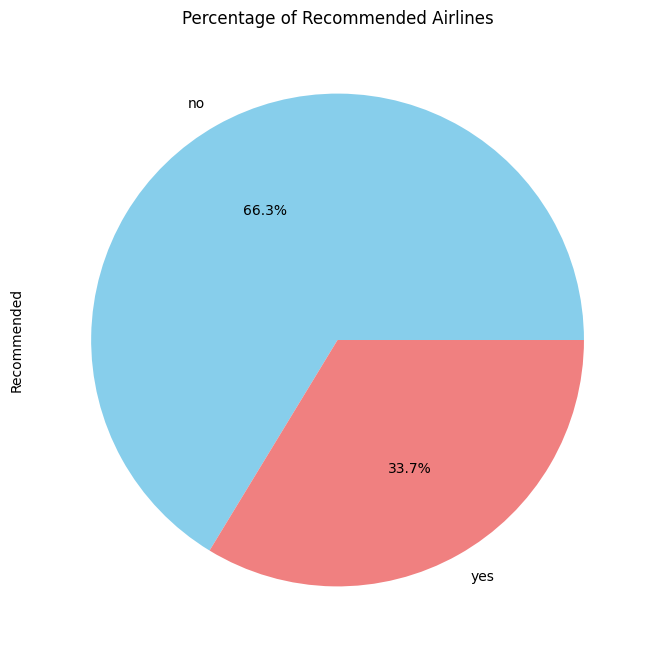

In [ ]:
plt.figure(figsize=(8, 8))
df['Recommended'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Recommended Airlines')
plt.show()


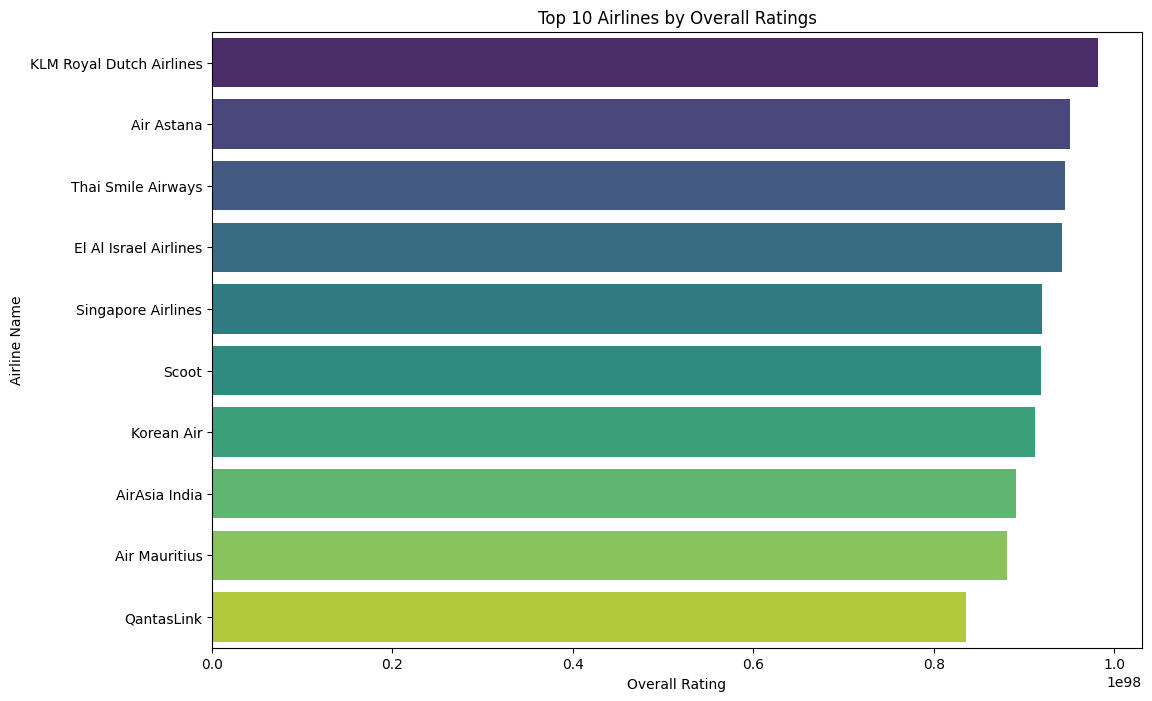

In [ ]:
top_airlines_overall = df.groupby('Airline Name')['Overall_Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_airlines_overall.values, y=top_airlines_overall.index, palette='viridis')
plt.title('Top 10 Airlines by Overall Ratings')
plt.xlabel('Overall Rating')
plt.show()

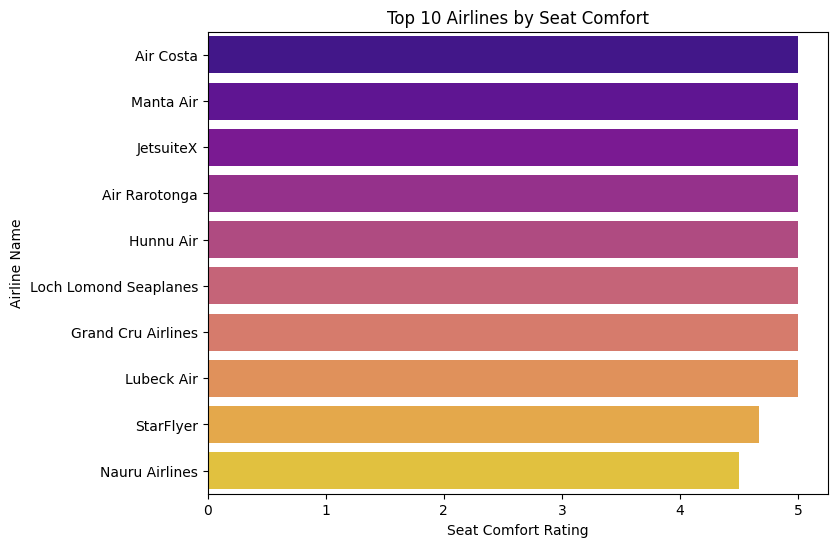

In [ ]:
top_airlines_seat_comfort = df.groupby('Airline Name')['Seat Comfort'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_airlines_seat_comfort.values, y=top_airlines_seat_comfort.index, palette='plasma')
plt.title('Top 10 Airlines by Seat Comfort')
plt.xlabel('Seat Comfort Rating')
plt.show()


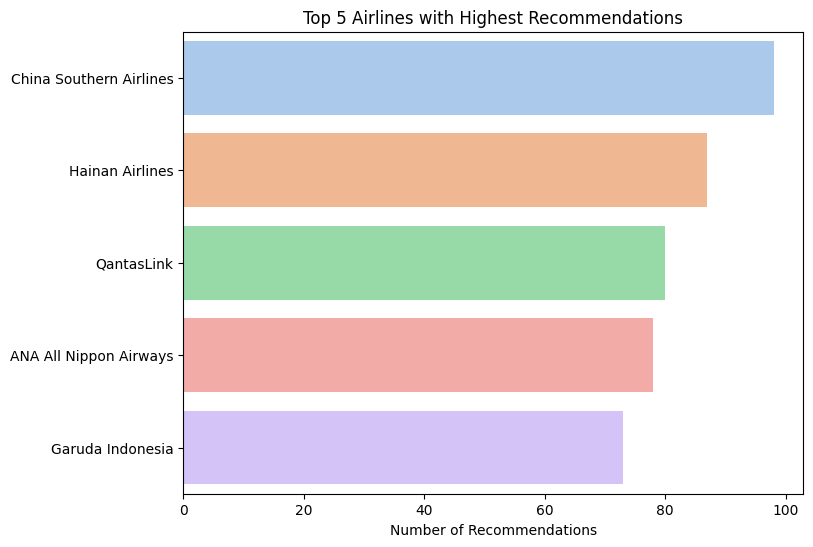

In [ ]:
top_recommended_airlines = df[df['Recommended'] == 'yes']['Airline Name'].value_counts().head(5)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_recommended_airlines.values, y=top_recommended_airlines.index, palette='pastel')
plt.title('Top 5 Airlines with Highest Recommendations')
plt.xlabel('Number of Recommendations')
plt.show()

In [ ]:
df['Type Of Traveller'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23171 entries, 0 to 23170
Series name: Type Of Traveller
Non-Null Count  Dtype 
--------------  ----- 
23171 non-null  object
dtypes: object(1)
memory usage: 181.1+ KB


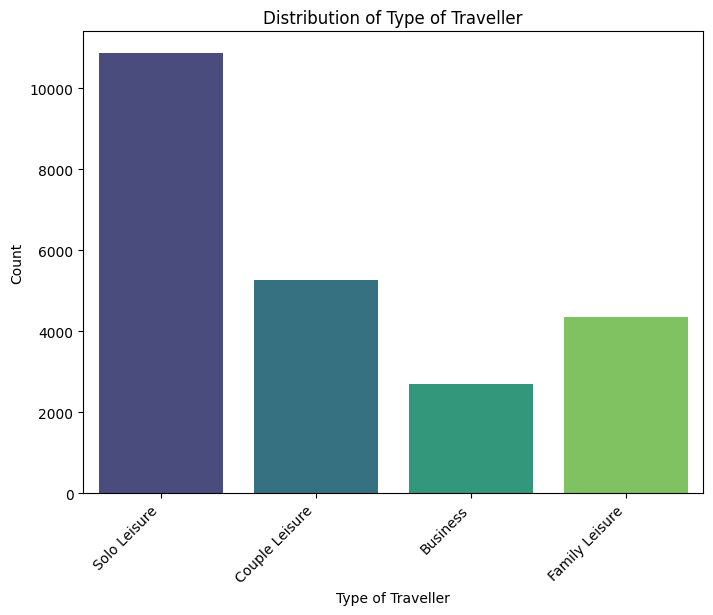

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type Of Traveller', data=df, palette='viridis')
plt.title('Distribution of Type of Traveller')
plt.xlabel('Type of Traveller')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

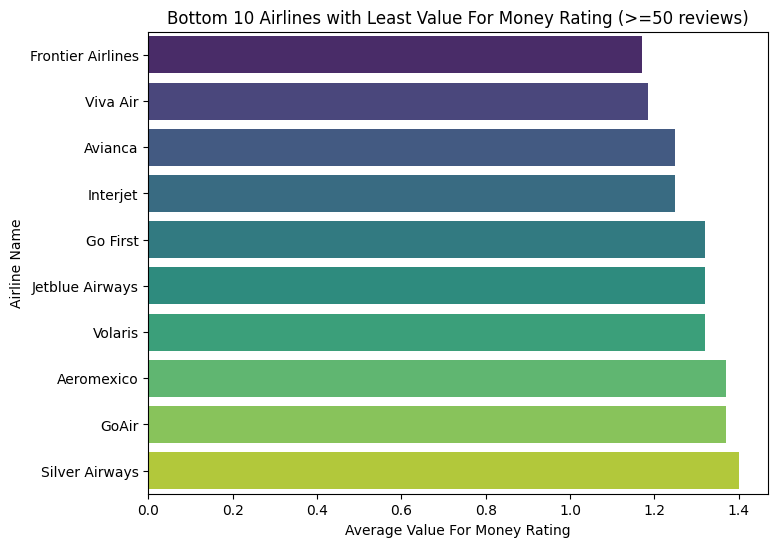

In [ ]:
filtered_airlines = df.groupby('Airline Name').filter(lambda x: len(x) >= 50)

# Get the bottom 10 airlines based on average 'Value For Money' rating
bottom_10_airlines = filtered_airlines.groupby('Airline Name')['Value For Money'].mean().nsmallest(10)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=bottom_10_airlines.values, y=bottom_10_airlines.index, palette='viridis')
plt.title('Bottom 10 Airlines with Least Value For Money Rating (>=50 reviews)')
plt.xlabel('Average Value For Money Rating')
plt.ylabel('Airline Name')
plt.show()

In [10]:
from textblob import TextBlob

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    words = nltk.word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in stopwords.words('english')]
    # Apply stemming
    words = [stemmer.stem(word) for word in words]
    # Apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    # Rejoin words to form processed text
    processed_text = ' '.join(words)
    return processed_text

# Apply text preprocessing to your dataset
df['Processed_Review'] = df['Review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [24]:
df['Processed_Review']

0        moroni mohe . turn pretti decent airlin . onli...
1        moroni anjouan . small airlin . ticket advis t...
2        anjouan dzaoudzi . small airlin airlin base co...
3        plea favor fli adria . rout munich pristina ju...
4        book flight airlin ! friend return sofia amste...
                               ...                        
23166    bangkok tokyo . ’ flown mani low cost airlin ,...
23167    avoid cost . book flight go singapor tokyo due...
23168    flight leav 23.15 hour half fli get back airpo...
23169    zipair jal ’ budget airlin . ’ class travel , ...
23170    lie connect narita lost money refund . agreeme...
Name: Processed_Review, Length: 23171, dtype: object

In [62]:
df['Sentiment'] = df['Processed_Review'].apply(lambda x: 1 if TextBlob(str(x)).sentiment.polarity > 0 else 0)

In [27]:
positive_reviews = df[df['Sentiment'] > 0]
negative_reviews = df[df['Sentiment'] == 0]

# Count the number of reviews in each sentiment category
positive_count = positive_reviews.shape[0]
negative_count = negative_reviews.shape[0]

# Create a bar plot
plt.bar(['Positive', 'Negative'], [positive_count, negative_count], color=['blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiments in Reviews')
plt.show()

NameError: ignored

In [63]:
train_texts, test_texts, y_train, y_test = train_test_split(df['Processed_Review'], df['Sentiment'], test_size=0.2, random_state=42)

In [30]:
test_texts

17155    tel aviv amman . short flight connect amman co...
10119    flight got delay fli dr hour , way back got ad...
18821    fli alon , 14 year old daughter ’ flight cance...
10628    pune delhi . airlin mislead ’ custom . experi ...
2188     fli rout malta amsterdam almost everi week tri...
                               ...                        
19724    partner flew london rio de janeiro . servic pr...
15314    bad experi compani . aircraft dirti , one hour...
8675     review appreci servic given emir fli cabin cre...
21902    terribl airlin . flight sydney denpasar flight...
10753    've flown 25 sep 2019 , plane suffer technic f...
Name: Processed_Review, Length: 4635, dtype: object

In [31]:
y_test

17155    0
10119    1
18821    1
10628    0
2188     1
        ..
19724    0
15314    0
8675     0
21902    1
10753    0
Name: Sentiment, Length: 4635, dtype: int64

In [64]:
tokenizer = Tokenizer(num_words=10000)  # You can adjust the vocabulary size
tokenizer.fit_on_texts(train_texts)

In [65]:
X_train = tokenizer.texts_to_sequences(train_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

In [66]:
X_train = pad_sequences(X_train, maxlen=100)  # You can adjust the sequence length
X_test = pad_sequences(X_test, maxlen=100)

In [18]:
X_train

array([[   0,    0,    0, ..., 1398,   20,   27],
       [   0,    0,    0, ...,  373,    7,  107],
       [  14,  125,  127, ...,  172,  880,   29],
       ...,
       [ 275,  343, 1133, ...,  883,  210,  544],
       [ 523,   46,   22, ...,  185,   33,    9],
       [   0,    0,    0, ...,    8,  172,  381]], dtype=int32)

In [36]:
X_test

array([[   0,    0,    0, ...,   41,  161,  143],
       [   0,    0,    0, ...,  148,   11,  381],
       [   0,    0,    0, ...,  102,    6,  116],
       ...,
       [   0,    0,    0, ...,  456,  213, 1073],
       [   0,    0,    0, ...,    5,  162, 1875],
       [   0,    0,    0, ..., 4189,    4,    9]], dtype=int32)

In [67]:
embedding_dim = 50  # You can adjust the embedding dimension
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

In [68]:
with open('/content/glove.6B.50d.txt', 'r', encoding='utf-8') as glove_file:
    for line in glove_file:
        values = line.split()
        word = values[0]
        if word in tokenizer.word_index:
            idx = tokenizer.word_index[word]
            embedding_matrix[idx] = np.array(values[1:], dtype='float32')

In [40]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.7306    ,  0.28400001, -0.040613  , ...,  0.34011999,
        -0.097281  ,  0.28005001],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.68514001, -0.90592003, -1.2536    , ..., -1.18270004,
        -0.64244002,  0.31736001],
       [-0.0024124 , -0.21386001,  0.68278998, ..., -0.39524001,
        -0.22368   , -0.54185998],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
train_texts_list = train_texts.tolist()

In [46]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

model_cnn = Sequential()
model_cnn.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=100, trainable=False))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(MaxPooling1D(5))
model_cnn.add(Flatten())
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_history = model_cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
290/290 [==============================] - 24s 71ms/step - loss: 0.5796 - accuracy: 0.6888 - val_loss: 0.5151 - val_accuracy: 0.7364
Epoch 2/5
290/290 [==============================] - 17s 59ms/step - loss: 0.4534 - accuracy: 0.7826 - val_loss: 0.4775 - val_accuracy: 0.7547
Epoch 3/5
290/290 [==============================] - 16s 55ms/step - loss: 0.3842 - accuracy: 0.8242 - val_loss: 0.4637 - val_accuracy: 0.7674
Epoch 4/5
290/290 [==============================] - 19s 67ms/step - loss: 0.3301 - accuracy: 0.8600 - val_loss: 0.4769 - val_accuracy: 0.7717
Epoch 5/5
290/290 [==============================] - 16s 56ms/step - loss: 0.2767 - accuracy: 0.8891 - val_loss: 0.4802 - val_accuracy: 0.7728


In [26]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           1179200   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           32128     
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 128)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2432)              0         
                                                                 
 dense (Dense)               (None, 1)                 2433      
                                                                 
Total params: 1213761 (4.63 MB)
Trainable params: 34561 (135.00 KB)
Non-trainable params: 1179200 (4.50 MB)
______________

In [22]:
loss, accuracy = model_cnn.evaluate(X_test, y_test)
print(f'CNN Test Loss: {loss:.4f}, CNN Test Accuracy: {accuracy:.4f}')

145/145 [==============================] - 2s 17ms/step - loss: 0.4824 - accuracy: 0.7691
CNN Test Loss: 0.4824, CNN Test Accuracy: 0.7691


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you already have X_train, y_train, X_test, y_test prepared

# Define the CNN model with dropout and early stopping
model_cnn_fine_tuned = Sequential()
model_cnn_fine_tuned.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=100, trainable=False))
model_cnn_fine_tuned.add(Conv1D(256, 5, activation='relu'))
model_cnn_fine_tuned.add(MaxPooling1D(2))
model_cnn_fine_tuned.add(Flatten())
model_cnn_fine_tuned.add(Dense(128, activation='relu'))
model_cnn_fine_tuned.add(Dropout(0.5))  # Added dropout for regularization
model_cnn_fine_tuned.add(Dense(1, activation='sigmoid'))

# Compile the model
model_cnn_fine_tuned.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
cnn_fine_history = model_cnn_fine_tuned.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/5
290/290 [==============================] - 32s 106ms/step - loss: 0.5849 - accuracy: 0.6806 - val_loss: 0.4936 - val_accuracy: 0.7387
Epoch 2/5
290/290 [==============================] - 32s 112ms/step - loss: 0.4544 - accuracy: 0.7797 - val_loss: 0.4381 - val_accuracy: 0.7797
Epoch 3/5
290/290 [==============================] - 29s 101ms/step - loss: 0.3754 - accuracy: 0.8228 - val_loss: 0.4661 - val_accuracy: 0.7538
Epoch 4/5
290/290 [==============================] - 33s 114ms/step - loss: 0.2903 - accuracy: 0.8725 - val_loss: 0.5161 - val_accuracy: 0.7504
Epoch 5/5
290/290 [==============================] - 29s 101ms/step - loss: 0.1825 - accuracy: 0.9282 - val_loss: 0.5816 - val_accuracy: 0.7730


In [29]:
model_cnn_fine_tuned.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           1179200   
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 256)           64256     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 48, 256)           0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 dense_1 (Dense)             (None, 128)               1572992   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                      

In [24]:
loss, accuracy = model_cnn_fine_tuned.evaluate(X_test, y_test)
print(f'CNN finetuned Test Loss: {loss:.4f}, CNN finetuned Test Accuracy: {accuracy:.4f}')

145/145 [==============================] - 2s 16ms/step - loss: 0.4417 - accuracy: 0.7756
CNN finetuned Test Loss: 0.4417, CNN finetuned Test Accuracy: 0.7756


In [45]:
model_lstm = Sequential()
model_lstm.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=100, trainable=False))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_history = model_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
290/290 [==============================] - 64s 206ms/step - loss: 0.5496 - accuracy: 0.7140 - val_loss: 0.5091 - val_accuracy: 0.7355
Epoch 2/5
290/290 [==============================] - 59s 202ms/step - loss: 0.4828 - accuracy: 0.7590 - val_loss: 0.4678 - val_accuracy: 0.7536
Epoch 3/5
290/290 [==============================] - 50s 173ms/step - loss: 0.4403 - accuracy: 0.7843 - val_loss: 0.4333 - val_accuracy: 0.7819
Epoch 4/5
290/290 [==============================] - 51s 176ms/step - loss: 0.4021 - accuracy: 0.8034 - val_loss: 0.4050 - val_accuracy: 0.7987
Epoch 5/5
290/290 [==============================] - 51s 175ms/step - loss: 0.3831 - accuracy: 0.8136 - val_loss: 0.3934 - val_accuracy: 0.8026


In [30]:
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           1179200   
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1239701 (4.73 MB)
Trainable params: 60501 (236.33 KB)
Non-trainable params: 1179200 (4.50 MB)
_________________________________________________________________


In [27]:
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f'LSTM Test Loss: {loss:.4f}, LSTM Test Accuracy: {accuracy:.4f}')

145/145 [==============================] - 4s 27ms/step - loss: 0.3901 - accuracy: 0.8119
LSTM Test Loss: 0.3901, LSTM Test Accuracy: 0.8119


In [48]:
from tensorflow.keras.layers import Bidirectional

model_bidirectional = Sequential()
model_bidirectional.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=100, trainable=False))
model_bidirectional.add(Bidirectional(LSTM(100)))
model_bidirectional.add(Dense(1, activation='sigmoid'))

model_bidirectional.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstmbi_history = model_bidirectional.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
290/290 [==============================] - 100s 331ms/step - loss: 0.5486 - accuracy: 0.7104 - val_loss: 0.5010 - val_accuracy: 0.7344
Epoch 2/5
290/290 [==============================] - 90s 311ms/step - loss: 0.4811 - accuracy: 0.7566 - val_loss: 0.4854 - val_accuracy: 0.7428
Epoch 3/5
290/290 [==============================] - 97s 333ms/step - loss: 0.4290 - accuracy: 0.7922 - val_loss: 0.4222 - val_accuracy: 0.7972
Epoch 4/5
290/290 [==============================] - 123s 425ms/step - loss: 0.3994 - accuracy: 0.8068 - val_loss: 0.4122 - val_accuracy: 0.7998
Epoch 5/5
290/290 [==============================] - 94s 324ms/step - loss: 0.3745 - accuracy: 0.8201 - val_loss: 0.3895 - val_accuracy: 0.8138


In [31]:
model_bidirectional.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 50)           1179200   
                                                                 
 bidirectional (Bidirection  (None, 200)               120800    
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 1300201 (4.96 MB)
Trainable params: 121001 (472.66 KB)
Non-trainable params: 1179200 (4.50 MB)
_________________________________________________________________


In [32]:
loss, accuracy = model_bidirectional.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

145/145 [==============================] - 8s 53ms/step - loss: 0.3862 - accuracy: 0.8117
Test Loss: 0.3862, Test Accuracy: 0.8117


In [69]:
from tensorflow.keras.layers import GRU

model_gru = Sequential()
model_gru.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=100, trainable=False))
model_gru.add(GRU(100))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gru_history = model_gru.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
290/290 [==============================] - 63s 204ms/step - loss: 0.5462 - accuracy: 0.7065 - val_loss: 0.4815 - val_accuracy: 0.7536
Epoch 2/5
290/290 [==============================] - 51s 178ms/step - loss: 0.4360 - accuracy: 0.7848 - val_loss: 0.4307 - val_accuracy: 0.7918
Epoch 3/5
290/290 [==============================] - 51s 174ms/step - loss: 0.3975 - accuracy: 0.8089 - val_loss: 0.3948 - val_accuracy: 0.8065
Epoch 4/5
290/290 [==============================] - 50s 171ms/step - loss: 0.3736 - accuracy: 0.8200 - val_loss: 0.3794 - val_accuracy: 0.8162
Epoch 5/5
290/290 [==============================] - 53s 181ms/step - loss: 0.3572 - accuracy: 0.8261 - val_loss: 0.3598 - val_accuracy: 0.8276


In [34]:
model_gru.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 50)           1179200   
                                                                 
 gru (GRU)                   (None, 100)               45600     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1224901 (4.67 MB)
Trainable params: 45701 (178.52 KB)
Non-trainable params: 1179200 (4.50 MB)
_________________________________________________________________


In [70]:
loss, accuracy = model_gru.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

145/145 [==============================] - 5s 34ms/step - loss: 0.3598 - accuracy: 0.8276
Test Loss: 0.3598, Test Accuracy: 0.8276


In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

# Create the finetuned GRU model
model_grufine = Sequential()

# Add an Embedding layer with pre-trained word embeddings
  # Adjust the embedding dimension
model_grufine.add(Embedding(len(tokenizer.word_index) + 1,50, weights=[embedding_matrix], input_length=100, trainable=False))


model_grufine.add(GRU(128))

# Add a GRU layer with 128 units and return sequences
model_grufine.add(GRU(100, dropout=0.2, recurrent_dropout=0.2))


# Add a Dense layer with sigmoid activation for binary classification
model_grufine.add(Dense(1, activation='sigmoid'))

# Compile the model
model_grufine.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])  # Adjust the learning rate

# Display the model summary
grufine_history = model_grufine.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))  # Adjust the batch size



ValueError: ignored

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def calculate_metrics(y_true, y_pred):
    # Calculate precision, recall, and F1 score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return precision, recall, f1

def print_metrics(model_name, y_true, y_pred):
    precision, recall, f1 = calculate_metrics(y_true, y_pred)

    print(f'Metrics for {model_name}:')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')


In [37]:
y_pred_cnn = model_cnn.predict(X_test)
y_pred_lstm = model_lstm.predict(X_test)
y_pred_bilstm = model_bidirectional.predict(X_test)
y_pred_gru = model_gru.predict(X_test)

145/145 [==============================] - 4s 23ms/step


In [38]:
y_pred_cnn2 = model_cnn_fine_tuned.predict(X_test)
y_pred_cnn2 = (y_pred_cnn2 > 0.5).astype(int)

145/145 [==============================] - 3s 18ms/step


In [ ]:
y_pred_gru2 = model_gru_finetuned.predict(X_test)
y_pred_gru2=(y_pred_gru2 > 0.5).astype(int)

145/145 [==============================] - 11s 63ms/step


In [39]:
y_pred_cnn=(y_pred_cnn > 0.5).astype(int)
y_pred_lstm=(y_pred_lstm > 0.5).astype(int)
y_pred_bilstm=(y_pred_bilstm > 0.5).astype(int)
y_pred_gru=(y_pred_gru > 0.5).astype(int)

In [40]:
print_metrics("CNN Fine tuned",y_test,y_pred_cnn2)

Metrics for CNN Fine tuned:
Precision: 0.8393
Recall: 0.7810
F1 Score: 0.8091


In [ ]:
print_metrics("GRU Fine tuned",y_test,y_pred_gru2)

Metrics for GRU Fine tuned:
Precision: 0.8346
Recall: 0.8450
F1 Score: 0.8398


In [74]:
print_metrics("LSTM Model:", y_test, y_pred_lstm)
print_metrics("\nBiLSTM Model", y_test, y_pred_bilstm)
print_metrics("\nGRU Model", y_test, y_pred_gru)
print_metrics("\nCNN Model", y_test, y_pred_cnn)

Metrics for LSTM Model::
Precision: 0.8797
Recall: 0.8005
F1 Score: 0.8382
Metrics for 
BiLSTM Model:
Precision: 0.8099
Recall: 0.9026
F1 Score: 0.8537
Metrics for 
GRU Model:
Precision: 0.8189
Recall: 0.9036
F1 Score: 0.8592
Metrics for 
CNN Model:
Precision: 0.8002
Recall: 0.8274
F1 Score: 0.8136


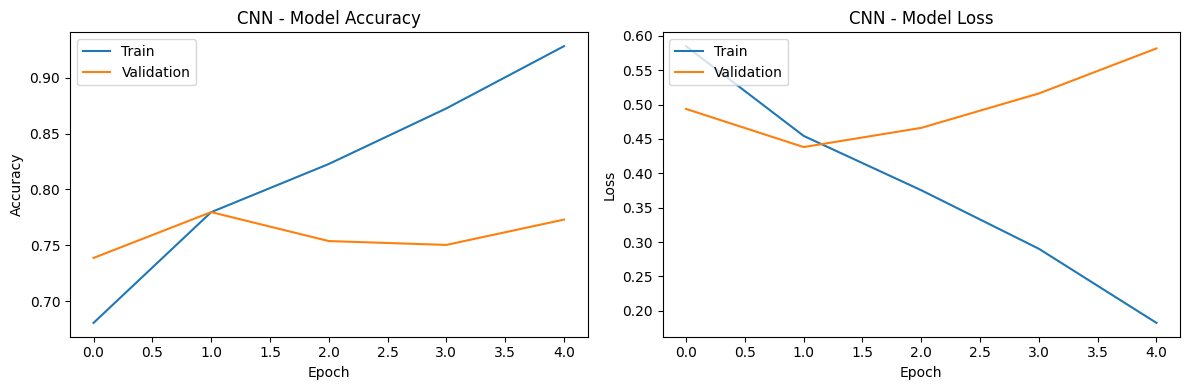

In [55]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(cnn_fine_history.history['accuracy'])
plt.plot(cnn_fine_history.history['val_accuracy'])
plt.title('CNN - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(cnn_fine_history.history['loss'])
plt.plot(cnn_fine_history.history['val_loss'])
plt.title('CNN - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

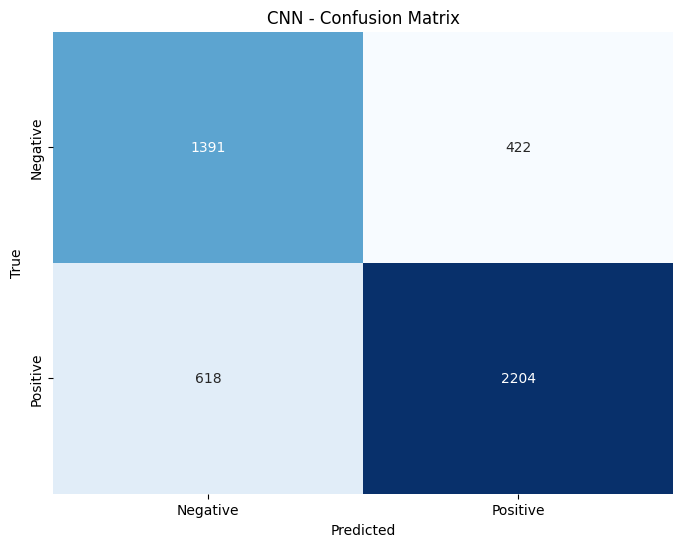

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
conf_mat = confusion_matrix(y_test, y_pred_cnn2)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('CNN - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [75]:
new_text = 'Not sure how Southwest in general but the check in process at Houston International was HORRIBLE. We didn’t receive help despite asking nicely and had to ask random passengers to assist us with checking in. They were too busy texting/ looking at phone. Very rude, racist customer service.'

In [76]:
new_text_sequence = tokenizer.texts_to_sequences([new_text])
new_text_padded = pad_sequences(new_text_sequence, maxlen=100)

In [80]:
# Make predictions
prediction = model_gru.predict(new_text_padded)

# If you're dealing with binary classification (sigmoid activation in the output layer)
predicted_label = 1 if prediction > 0.5 else 0

print(f"Predicted Label: {predicted_label}, Confidence: {prediction[0][0]}")

1/1 [==============================] - 1s 927ms/step
Predicted Label: 0, Confidence: 0.12044776976108551
